In [1]:
from sklearn import datasets, svm, metrics
mnist = datasets.load_digits()


In [2]:
mnist["data"].shape

(1797L, 64L)

In [3]:
mnist["target"].shape

(1797L,)

In [4]:
mnist["images"].shape
im= mnist["images"]
im[5]

array([[ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16., 16., 14.,  0.,  0.],
       [ 0.,  0., 13., 16., 15., 10.,  1.,  0.],
       [ 0.,  0., 11., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  7., 16.,  7.,  0.],
       [ 0.,  0.,  0.,  0.,  4., 16.,  9.,  0.],
       [ 0.,  0.,  5.,  4., 12., 16.,  4.,  0.],
       [ 0.,  0.,  9., 16., 16., 10.,  0.,  0.]])

In [5]:
mnist_data = mnist["data"]
mnist_target = mnist["target"]

In [6]:
#Attribute Information: 8x8 image of integer pixels in the range 0..16.
mnist

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of

In [7]:
type(mnist_data)

numpy.ndarray

In [8]:
import pandas as pd
mnist_data_df = pd.DataFrame(data = mnist_data)

In [9]:
mnist_data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
mnist_data_df.shape

(1797, 64)

In [11]:
mnist_target
mnist_target_df = pd.DataFrame(data = mnist_target)
mnist_target_df.shape

(1797, 1)

In [43]:
mnist_target_df.head()

,0
0,0
1,1
2,2
3,3
4,4


In [12]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_data_digit = mnist_data[5]
some_data_reshaped = some_data_digit.reshape(8,8)


In [13]:
type(some_data_digit)

numpy.ndarray

In [14]:
some_data_digit

array([ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 16.,
       14.,  0.,  0.,  0.,  0., 13., 16., 15., 10.,  1.,  0.,  0.,  0.,
       11., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,  7., 16.,  7.,
        0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  5.,  4.,
       12., 16.,  4.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.])

In [15]:
some_data_reshaped

array([[ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16., 16., 14.,  0.,  0.],
       [ 0.,  0., 13., 16., 15., 10.,  1.,  0.],
       [ 0.,  0., 11., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  7., 16.,  7.,  0.],
       [ 0.,  0.,  0.,  0.,  4., 16.,  9.,  0.],
       [ 0.,  0.,  5.,  4., 12., 16.,  4.,  0.],
       [ 0.,  0.,  9., 16., 16., 10.,  0.,  0.]])

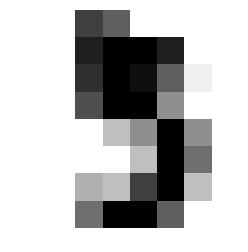

In [16]:
#plt.figure(1, figsize=(3, 3))
plt.axis("off")
plt.imshow(some_data_reshaped, cmap=plt.cm.binary, interpolation='nearest')
plt.show()

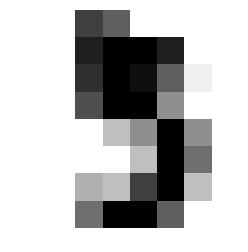

In [17]:
plt.axis("off")
plt.imshow(im[5], cmap=plt.cm.binary, interpolation='nearest')
plt.show()
#hence image reshaped data for 8 mutiply 8

In [18]:
mnist_target[5]

5

In [58]:
X, y = mnist["data"], mnist["target"]

In [59]:
X.shape

(1797L, 64L)

In [60]:
y.shape

(1797L,)

In [61]:
X_train,X_test, y_train,y_test = X[:1400],X[1401:],y[:1400],y[1401:]

In [67]:
import numpy as np
shuffle_index = np.random.permutation(1400)
X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]

In [68]:
y_train_5 = (y_train ==5)
y_test_5 = (y_test == 5)

In [72]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [74]:
some_digit = X[500]
some_digit

array([ 0.,  0.,  3., 10., 14.,  3.,  0.,  0.,  0.,  8., 16., 11., 10.,
       13.,  0.,  0.,  0.,  7., 14.,  0.,  1., 15.,  2.,  0.,  0.,  2.,
       16.,  9., 16., 16.,  1.,  0.,  0.,  0., 12., 16., 15., 15.,  2.,
        0.,  0.,  0., 12., 10.,  0.,  8.,  8.,  0.,  0.,  0.,  9., 12.,
        4.,  7., 12.,  0.,  0.,  0.,  2., 11., 16., 16.,  9.,  0.])

In [76]:
sgd_clf.predict([some_digit])

array([False])

In [77]:
y[500]

8

In [80]:
X_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  7.,  0.,  0.],
       [ 0.,  0.,  0., ...,  2.,  0.,  0.],
       ...,
       [ 0.,  0.,  7., ..., 16., 16.,  5.],
       [ 0.,  0.,  3., ...,  1.,  0.,  0.],
       [ 0.,  0.,  7., ...,  0.,  0.,  0.]])

In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring = "accuracy")

array([0.99357602, 0.97858672, 0.98712446])

In [83]:
from sklearn.base import BaseEstimator

In [85]:
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)
                        

In [86]:
np.zeros((len(X),1),dtype=bool)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [87]:
never_5_classifier = Never5Classifier()

In [88]:
cross_val_score(never_5_classifier,X_train,y_train_5,cv=3,scoring = "accuracy")

array([0.91648822, 0.88865096, 0.89270386])

In [92]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [106]:
y_train_pred.shape

(1400L,)

In [95]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[1255,    4],
       [  15,  126]], dtype=int64)

In [98]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_train_pred)


0.9692307692307692

In [99]:
recall_score(y_train_5,y_train_pred)

0.8936170212765957

In [100]:
from sklearn.metrics import f1_score


In [101]:
f1_score(y_train_5,y_train_pred)

0.929889298892989

In [102]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3, method="decision_function")

In [111]:
y_scores

array([-10763.01596743,  -3963.93404653,  -4636.60353805, ...,
        -8102.9132325 ,  -8487.46077175,   -745.35458018])

In [105]:
y_scores.shape

(1400L,)

In [107]:
from sklearn.metrics import precision_recall_curve

In [108]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores) 

In [109]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],"b--",label = "Precision")
    plt.plot(thresholds, recalls[:-1],"g-",label = "Recall")
    plt.xlabel("Thresholds")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

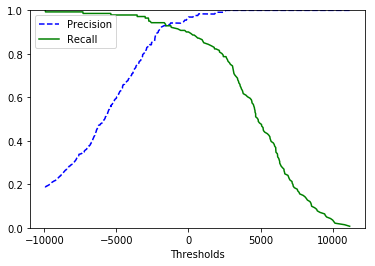

In [110]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [112]:
y_train_pred_90 = (y_scores > -500)

In [113]:
precision_score(y_train_5, y_train_pred_90)

0.9481481481481482

In [114]:
recall_score(y_train_5, y_train_pred_90)

0.9078014184397163

In [115]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_train_5, y_scores)

In [120]:
def plot_roc_curve(fpr,tpr, label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    # x and corresponding y ex. [x1,x2] and [y1,y2]
    plt.plot([0,1],[0,1],'k--')
    # axis xmin,xmax,ymin,ymax
    plt.axis([0,1,0,1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    
    

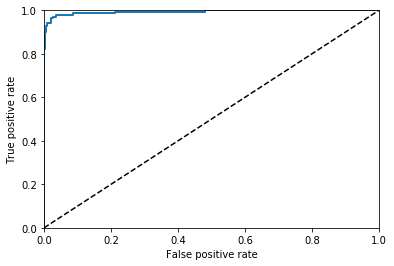

In [121]:
plot_roc_curve(fpr,tpr)

In [123]:
# area under the curve AKA ROC AUC(area under the curve)
from sklearn.metrics import roc_auc_score


In [124]:
roc_auc_score(y_train_5, y_scores)

0.9931387626113262

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
forest_clf = RandomForestClassifier(random_state=42)

In [128]:
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3, method="predict_proba")

c:\python27\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [129]:
y_probas_forest

array([[1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4]])

In [132]:
y_scores_forest = y_probas_forest[:,1]
y_scores_forest

array([0. , 0.1, 0. , ..., 0. , 0. , 0.4])

In [133]:
fpr_forest,tpr_forest,threshold_forest = roc_curve(y_train_5,y_scores_forest)

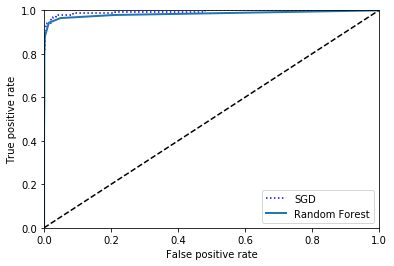

In [134]:
plt.plot(fpr,tpr,"b:", label="SGD")
plot_roc_curve(fpr_forest,tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [135]:
roc_auc_score(y_train_5,y_scores_forest)

0.9837341355009885

In [138]:
# try for all classes not 5 and not 5
sgd_clf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [147]:
some_digit = X_train[90]
print(y_train[90])


1


In [150]:
y_predict = sgd_clf.predict([some_digit])

In [151]:
y_predict

array([1])

In [152]:
some_digit_score = sgd_clf.decision_function([some_digit])

In [153]:
some_digit_score

array([[-14549.33123951,   3910.2822511 ,  -5807.34556275,
         -9980.85267031,  -5511.75424674,  -9984.01831435,
         -8751.5193903 ,  -7028.11729743,  -5083.72494654,
        -12460.36876435]])

In [154]:
np.argmax(some_digit_score)

1

In [155]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [156]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.92978723, 0.95074946, 0.92656587])

In [158]:
from sklearn.preprocessing import StandardScaler

In [160]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train.astype(np.float64))

In [161]:
cross_val_score(sgd_clf,X_train_scaler,y_train,cv=3,scoring="accuracy")

array([0.96382979, 0.95717345, 0.95680346])

In [162]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scaler,y_train,cv=3)

In [163]:
conf_max = confusion_matrix(y_train,y_train_pred)

In [164]:
conf_max

array([[139,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 132,   1,   0,   0,   1,   0,   0,   6,   3],
       [  0,   1, 133,   0,   0,   0,   0,   1,   2,   0],
       [  0,   1,   1, 134,   0,   3,   0,   0,   4,   1],
       [  0,   2,   0,   0, 133,   0,   0,   4,   0,   1],
       [  0,   0,   0,   1,   0, 137,   1,   0,   0,   2],
       [  0,   0,   0,   0,   1,   0, 140,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 139,   0,   1],
       [  0,   6,   1,   0,   0,   3,   1,   0, 121,   3],
       [  0,   0,   0,   1,   0,   2,   0,   0,   1, 135]], dtype=int64)

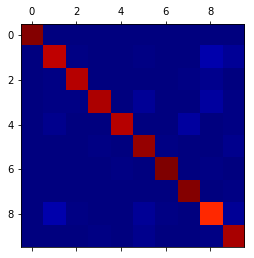

In [185]:
from matplotlib import cm
cmap = cm.get_cmap('jet')
plt.matshow(conf_max,cmap=cmap)

In [168]:
conf_max

array([[139,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 132,   1,   0,   0,   1,   0,   0,   6,   3],
       [  0,   1, 133,   0,   0,   0,   0,   1,   2,   0],
       [  0,   1,   1, 134,   0,   3,   0,   0,   4,   1],
       [  0,   2,   0,   0, 133,   0,   0,   4,   0,   1],
       [  0,   0,   0,   1,   0, 137,   1,   0,   0,   2],
       [  0,   0,   0,   0,   1,   0, 140,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 139,   0,   1],
       [  0,   6,   1,   0,   0,   3,   1,   0, 121,   3],
       [  0,   0,   0,   1,   0,   2,   0,   0,   1, 135]], dtype=int64)

In [174]:
row_sums = conf_max.sum(axis=1,keepdims=True)

In [175]:
row_sums

array([[139],
       [143],
       [137],
       [144],
       [140],
       [141],
       [142],
       [140],
       [135],
       [139]], dtype=int64)

In [176]:
norm_conf_matrix = conf_max/row_sums

In [177]:
norm_conf_matrix

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [207]:
#from aregon

def plot_digits(instances, images_per_row=10, **options):
    size = 8
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

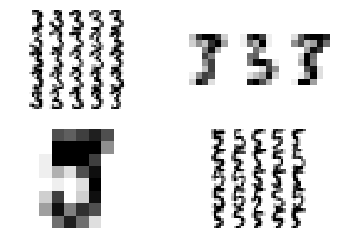

In [208]:
cl_a,cl_b=3,5
X_aa = X_train[(y_train==cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train==cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train==cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train==cl_b) & (y_train_pred == cl_b)]

plt.subplot(221); plot_digits(X_aa[:25],images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25],images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25],images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25],images_per_row=5)


In [211]:
# this is giving error. reason not found
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
def plot_digits(data,images_per_rows,**options):
    some_data_reshaped = data.reshape((8,8)
    plt.imshow(some_data_reshaped, cmap=plt.cm.binary)

SyntaxError: invalid syntax (<ipython-input-211-3d77a53cbffe>, line 7)